In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib

from sklearn.manifold import TSNE
from sklearn import mixture
from scipy import linalg

# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
             
# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

In [2]:
### Prepare data for t-SNE
papers_reference = pd.read_pickle('papers_reference')
codebook_reference = pd.read_pickle('codebook_reference')
paper_emb = np.stack(papers_reference['embedding'].to_numpy())
print('paper_emb', np.shape(paper_emb))


codebook_emb_df = pd.DataFrame()
for i in range(0,len(codebook_reference)):
    if (codebook_reference.iloc[i]['Primary Identity'] == 'Usable Privacy'):
        tmp_match = (papers_reference[papers_reference['doi']  == codebook_reference.iloc[i]['doi']])
        codebook_emb_df = pd.concat([codebook_emb_df, tmp_match], ignore_index=True)

codebook_emb = np.zeros((len(codebook_emb_df), 1536))
for i in range(0,len(codebook_emb_df)):
    codebook_emb[i,:] = codebook_emb_df['embedding'].to_numpy()[i] 
codebook_emb_up = codebook_emb.copy()

codebook_emb_df = pd.DataFrame()
for i in range(0,len(codebook_reference)):
    if (codebook_reference.iloc[i]['Primary Identity'] == 'Sensing'):
        tmp_match = (papers_reference[papers_reference['doi']  == codebook_reference.iloc[i]['doi']])
        codebook_emb_df = pd.concat([codebook_emb_df, tmp_match], ignore_index=True)

codebook_emb = np.zeros((len(codebook_emb_df), 1536))
for i in range(0,len(codebook_emb_df)):
    codebook_emb[i,:] = codebook_emb_df['embedding'].to_numpy()[i] 
codebook_emb_sen = codebook_emb.copy()

stacked_papers_embeddings = np.vstack((codebook_emb_up, codebook_emb_sen, paper_emb))

venues = ['ccs', 'chi', 'mobicom','sensys','mobisys', 'fat','imwut', 'USENIX','PETS','SOUPS','NDSS','IEEE S&P']
startidx=[]
stopidx=[]
for venue in venues:
    index = papers_reference[papers_reference['venue'] == venue].index
    startidx.append(index[0]+114)
    stopidx.append(index[-1]+114)
    print(venue, index[0]+114, index[-1]+114)

paper_emb (10122, 1536)
ccs 114 1178
chi 1179 4896
mobicom 4897 5434
sensys 5435 6025
mobisys 6026 6442
fat 6443 6578
imwut 6579 7354
USENIX 7355 8547
PETS 9601 9666
SOUPS 10077 10235
NDSS 8548 8985
IEEE S&P 8986 9600


In [3]:
### Generate t-SNE projection
matrix=np.array(stacked_papers_embeddings)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate=300)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(10236, 2)

(array([-39.42065951,  -2.27722707]), array([[ 700.25136653,    3.52813429],
       [   3.52813429, 1188.54263405]]), array([-39.42065951,  -2.27722707]), array([[ 700.25136653,    3.52813429],
       [   3.52813429, 1188.54263405]]))
HCI-MOB overlap: 0.5202382552461854
HCI-SEC overlap: 0.3044725641601653
HCI-PRIV overlap: 0.5829247153363837
MOB-SEC overlap: 0.49518245572439384
MOB-PRIV overlap: 0.2692683467281348
SEC-PRIV overlap: 0.6741881304535822


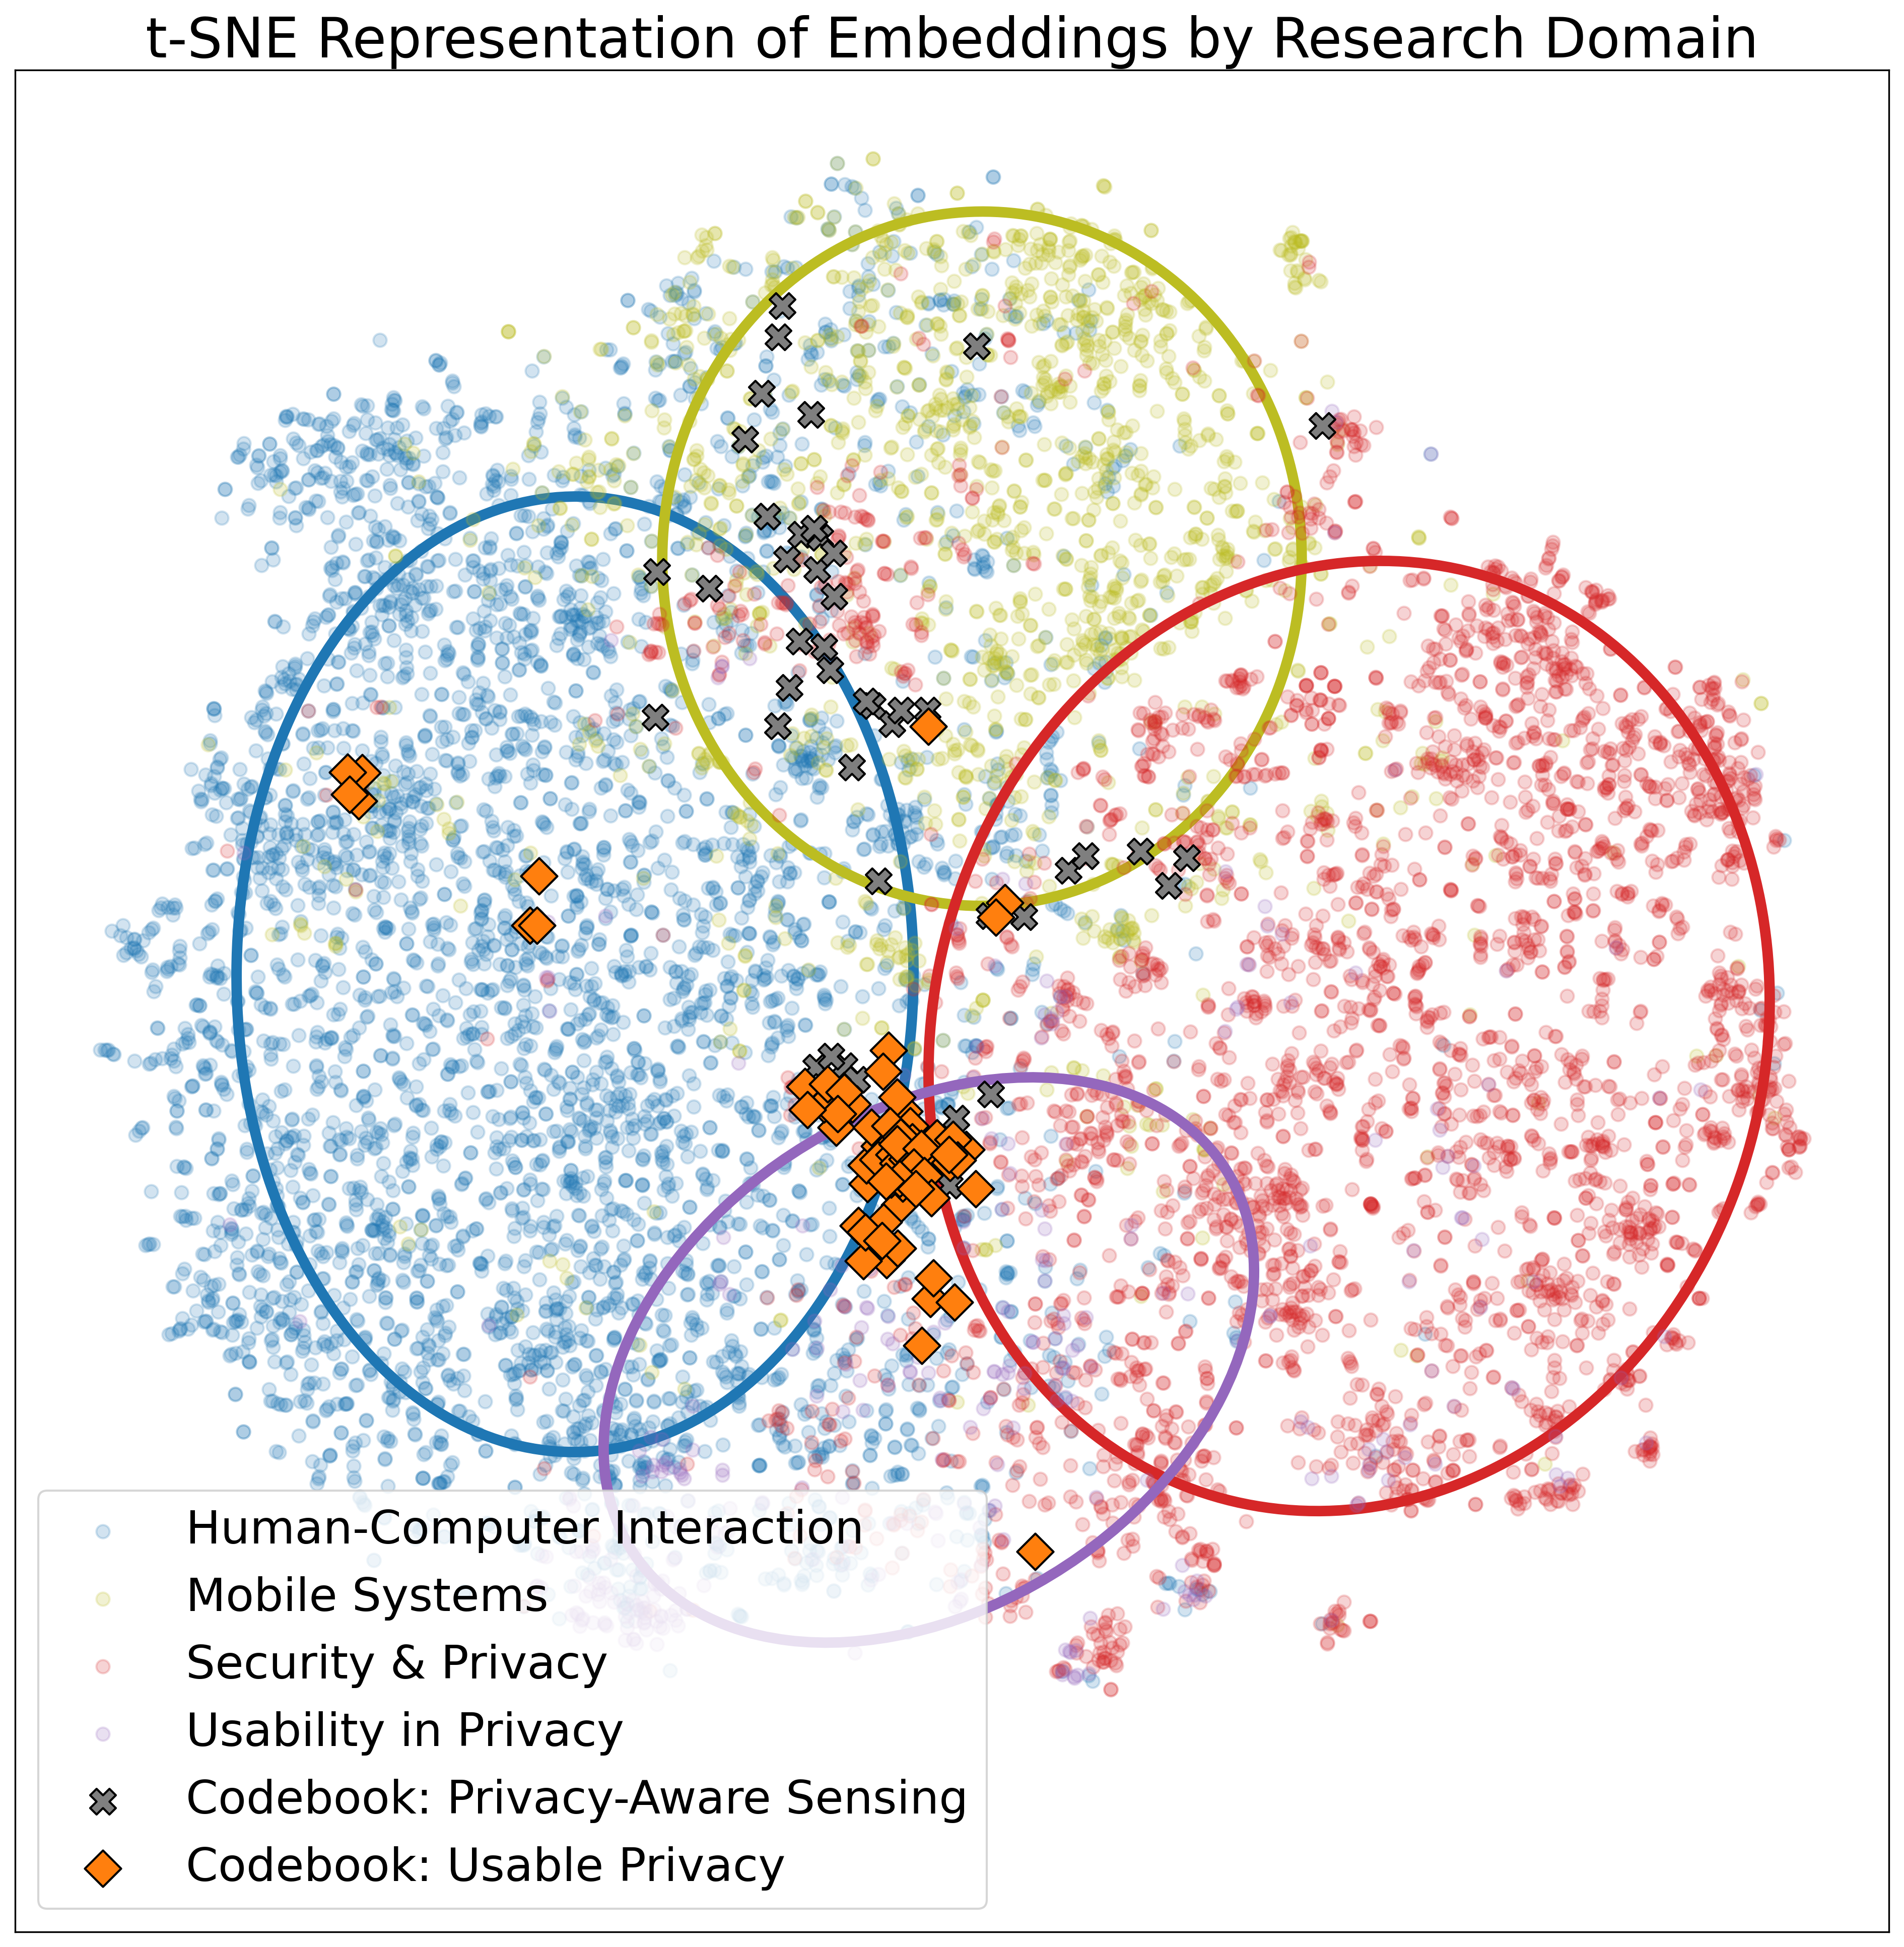

In [4]:
### Plot t-SNE projection

colors = ["red", "darkorange", "gold", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
labels_vor = np.ones(len(x))
for j in range(0,len(venues)):
    labels_vor[startidx[j]:stopidx[j]] = j

sns.reset_orig()
plt.rcParams.update({'font.size': 22})
fig = plt.figure(num=None, figsize=(16,16), dpi=300, facecolor='w', edgecolor='k')
splot = plt.subplot(1,1,1)
colormap = matplotlib.colors.ListedColormap(colors)


hcix = np.hstack((x[startidx[1]:stopidx[1]], x[startidx[6]:stopidx[6]]))
hciy = np.hstack((y[startidx[1]:stopidx[1]], y[startidx[6]:stopidx[6]]))

hcix = np.hstack((x[startidx[1]:stopidx[1]], x[startidx[6]:stopidx[6]]))
hciy = np.hstack((y[startidx[1]:stopidx[1]], y[startidx[6]:stopidx[6]]))


mobx = np.hstack((x[startidx[2]:stopidx[2]], x[startidx[3]:stopidx[3]],x[startidx[4]:stopidx[4]]))
moby = np.hstack((y[startidx[2]:stopidx[2]], y[startidx[3]:stopidx[3]],y[startidx[4]:stopidx[4]]))

secx = np.hstack((x[startidx[0]:stopidx[0]], x[startidx[7]:stopidx[7]],x[startidx[10]:stopidx[10]], x[startidx[11]:stopidx[11]]))
secy = np.hstack((y[startidx[0]:stopidx[0]], y[startidx[7]:stopidx[7]],y[startidx[10]:stopidx[10]], y[startidx[11]:stopidx[11]]))

privx = np.hstack((x[startidx[5]:stopidx[5]], x[startidx[8]:stopidx[8]],x[startidx[9]:stopidx[9]]))
privy = np.hstack((y[startidx[5]:stopidx[5]], y[startidx[8]:stopidx[8]],y[startidx[9]:stopidx[9]]))


def gmmplot(venx, veny, ven_lab, tabcolor, e1, e2):
    gmmfit = np.vstack((venx,veny)).T
    gmm = mixture.BayesianGaussianMixture(n_components=1, max_iter=400, 
                                          covariance_type="full", 
                                          init_params='k-means++').fit(gmmfit)
    means, covariances, Y_ = gmm.means_, gmm.covariances_, gmm.predict(gmmfit)

    for i, (mean, covar) in enumerate(zip(means, covariances)):
        v, w = linalg.eigh(covar)
        v = e1 * np.sqrt(e2) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(gmmfit[Y_ == i, 0], gmmfit[Y_ == i, 1], alpha=0.2, s=40, marker="o",color=tableau20[tabcolor], label=ven_lab)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=tableau20[tabcolor], linewidth=5, alpha=1, fill=False)
        ell.set_clip_box(splot.bbox)
#             ell.set_alpha(0.2)
        splot.add_artist(ell)
    return means[0],covariances[0]
    
def gaussian_overlap(mu1, sigma1, mu2, sigma2):
    diff = mu1 - mu2
    cov_sum = 0.5 * (sigma1 + sigma2)
    _, logdet_cov_sum = np.linalg.slogdet(cov_sum)
    _, logdet_sigma1 = np.linalg.slogdet(sigma1)
    _, logdet_sigma2 = np.linalg.slogdet(sigma2)
    
    exponent_term = -0.125 * np.dot(diff.T, np.dot(np.linalg.inv(cov_sum), diff))
    overlap = np.exp(exponent_term - 0.5 * (logdet_cov_sum - 0.5 * (logdet_sigma1 + logdet_sigma2)))
    
    return overlap




hcimeans, hcicov = gmmplot(hcix,hciy,'Human-Computer Interaction', 0, 2,2)
mobmeans, mobcov = gmmplot(mobx,moby,'Mobile Systems', 16, 2,2)
secmeans, seccov = gmmplot(secx,secy,'Security & Privacy', 6, 2,2.5)
privmeans, prevcov = gmmplot(privx,privy,'Usability in Privacy', 8,2,1.2)
print((hcimeans,hcicov, hcimeans,hcicov))

HMO = gaussian_overlap(hcimeans,hcicov, mobmeans, mobcov)
print("HCI-MOB overlap:", HMO)
HSO = gaussian_overlap(hcimeans,hcicov, secmeans, seccov)
print("HCI-SEC overlap:", HSO)
HPO = gaussian_overlap(hcimeans,hcicov, privmeans, prevcov)
print("HCI-PRIV overlap:", HPO)

MSO = gaussian_overlap(mobmeans, mobcov, secmeans, seccov)
print("MOB-SEC overlap:", MSO)
MPO = gaussian_overlap(mobmeans, mobcov,privmeans, prevcov)
print("MOB-PRIV overlap:", MPO)

SPO = gaussian_overlap(secmeans, seccov, privmeans, prevcov)
print("SEC-PRIV overlap:", SPO)




plt.scatter(x[len(codebook_emb_up):114], y[len(codebook_emb_up):114], color=tableau20[14], alpha=1, marker = 'X', edgecolors=(0,0,0,1), s=150, label='Codebook: Privacy-Aware Sensing')
plt.scatter(x[:len(codebook_emb_up)], y[:len(codebook_emb_up)], color=tableau20[2], alpha=1, marker = 'D', edgecolors=(0,0,0,1), s=150, label='Codebook: Usable Privacy')

plt.ylim(-100,90)
plt.xticks([])
plt.yticks([])

plt.legend(loc='lower left')
plt.title("t-SNE Representation of Embeddings by Research Domain")
plt.savefig('figure1.png', bbox_inches='tight')
plt.show()